# Análise Exploratória de Dados (INPI-BR_v5)

Sobre os dados utilizados na etapa de avaliaçãodo ciclo 2

In [1]:
import os
import sys
sys.path.append('../')  # running from `project_root/notebooks`
import numpy as np
import pandas as pd
from machine_learning import ENV, plot_dist, text_length_hist, count_words, STOP_WORDS, plot_wordcloud, plot_bars, get_word_df
from operator import itemgetter

## dense_dataset_v5

Gerado a partir da combinação do INPI-BR_v4 (672.935 exemplos) com resumos recuperados do EPO.

- (385673, 8)
- `no_pedido|classif_date|title|abstract|ipc|area|last_rpi|deposit_date`
- produz 385.673 exemplos depois de limpo

In [2]:
csv_file = os.path.join(ENV['OUTPUT_FOLDER'], 'dense_dataset_evaluation.csv')
df_v5 = pd.read_csv(csv_file, 
                 sep=ENV['DELIMITER'], 
                 parse_dates=['classif_date', 'deposit_date'],
                 dtype={
                     'area': str,
                     'last_rpi': int,
                 })
print(f'Formato dos dados: {df_v5.shape}')
df_v5.sample(5)

Formato dos dados: (385673, 8)


no_pedido classif_date  \
170795       PI0202735   2004-05-11   
295541       PI0709184   2011-06-28   
382642  BR112020024616   2020-12-15   
242746       PI0700635   2007-11-06   
251196       PI0513487   2008-05-06   

                                                    title  \
170795                                  BARREIRA RETRÁTIL   
295541  PROCESSO PARA A PURIFICAÇÃO DE CLORIDRATO DE R...   
382642  LAYOUT DE UM CAMPO DE PRODUÇÃO DE HIDROCARBONETOS   
242746  RESOLUÇÃO DE AMBIGÜIDADE DE DIPOLO MAGNÉTICO E...   
251196  PROCESSO PARA REDUZIR A PRESSÃO DE REINÍCIO DE...   

                                                 abstract  \
170795  BARREIRA RETRÁTIL A presente invenção conjuga ...   
295541  PROCESSO PARA A PURIFICAÇÃO DE CLORIDRATO DE R...   
382642  a invenção se refere a um layout de campo de p...   
242746  RESOLUÇÃO DE AMBIGÜIDADE DE DIPOLO MAGNÉTICO E...   
251196  PROCESSO PARA REDUZIR A PRESSÃO DE REINICIO DE...   

                                                      ipc   area  last_rpi  \
170795                                     ['E01F 13/00']  DICIV      1740   
295541                                    ['C07D 209/34']  DIPAQ      2112   
382642  ['E21B 23/08', 'B08B 9/04', 'E21B 43/00', 'F17...  DICIV      2606   
242746                        ['A61B 5/05', 'G01R 33/12']  DICEL      1922   
251196                        ['F17D 1/16', 'G01N 29/14']  DICIV      1948   

       deposit_date  
170795   2002-07-15  
295541   2007-03-21  
382642          NaT  
242746   2007-03-05  
251196   2005-07-18

#### Análise e Remoção das linhas com valores nulos

In [3]:
print(f'Quantidade de exemplos com valores nulos:\n{df_v5.isna().sum()}')
print('Limpando os nulos...')
df_v5.dropna(subset=['abstract', 'area'], inplace=True)
print(f'Formato dos dados: {df_v5.shape}')

Quantidade de exemplos com valores nulos:
no_pedido           0
classif_date      281
title               0
abstract            0
ipc                 0
area                0
last_rpi            0
deposit_date    43493
dtype: int64
Limpando os nulos...
Formato dos dados: (385673, 8)


#### Análise e Remoção das linhas duplicadas

In [4]:
df_duplicated_v5 = df_v5[df_v5.duplicated()]
print(f'Quantidade de exemplos duplicados: {df_duplicated_v5.shape[0]}')
df_duplicated_v5.head(10)
print('Limpando os duplicados...')
df_v5.drop_duplicates(inplace=True)
print(f'Formato dos dados: {df_v5.shape}')

Quantidade de exemplos duplicados: 0


Empty DataFrame
Columns: [no_pedido, classif_date, title, abstract, ipc, area, last_rpi, deposit_date]
Index: []

Limpando os duplicados...
Formato dos dados: (385673, 8)


#### Estatísticas

In [5]:
df_v5.describe(include='all', datetime_is_numeric=True)

no_pedido                   classif_date              title  \
count      385673                         385392             385673   
unique     385673                            NaN             368869   
top     PI9007700                            NaN  ARTIGO ABSORVENTE   
freq            1                            NaN                160   
mean          NaN  2007-01-08 02:02:50.830738432                NaN   
min           NaN            1992-08-11 00:00:00                NaN   
25%           NaN            2001-01-02 00:00:00                NaN   
50%           NaN            2006-05-09 00:00:00                NaN   
75%           NaN            2013-02-26 00:00:00                NaN   
max           NaN            2021-10-26 00:00:00                NaN   
std           NaN                            NaN                NaN   

                    abstract             ipc    area       last_rpi  \
count                 385673          385673  385673  385673.000000   
unique                385022          207655      19            NaN   
top     abstract not avaible  ['A61F 13/15']   DIMEC            NaN   
freq                      83            1009   45587            NaN   
mean                     NaN             NaN     NaN    1814.782808   
min                      NaN             NaN     NaN    1132.000000   
25%                      NaN             NaN     NaN    1543.000000   
50%                      NaN             NaN     NaN    1788.000000   
75%                      NaN             NaN     NaN    2100.000000   
max                      NaN             NaN     NaN    2645.000000   
std                      NaN             NaN     NaN     354.754314   

                         deposit_date  
count                          342180  
unique                            NaN  
top                               NaN  
freq                              NaN  
mean    2002-04-12 00:55:36.517622400  
min               1900-12-31 00:00:00  
25%               1998-02-16 00:00:00  
50%               2002-05-17 00:00:00  
75%               2006-04-20 00:00:00  
max               2020-01-30 00:00:00  
std                               NaN

In [6]:
df = df_v5
# df = df_v1
# df = df_v2
# df = df_v3
# df = df_v4

## Distribuição das observações  pela data da classificação

Como temos RPIs até 2021, temos data de classificação até esse ano, mas os pedidos certamente foram depositados muito antes.

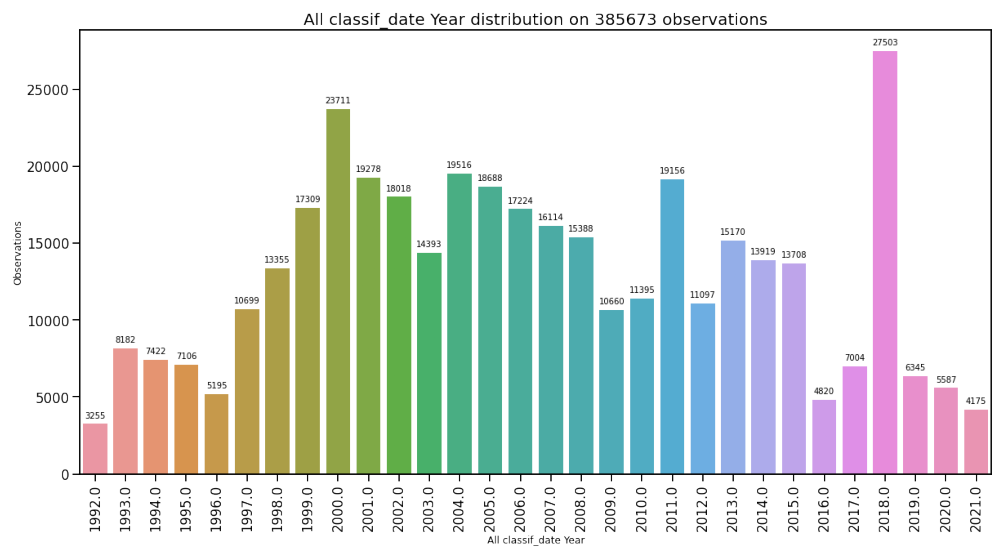

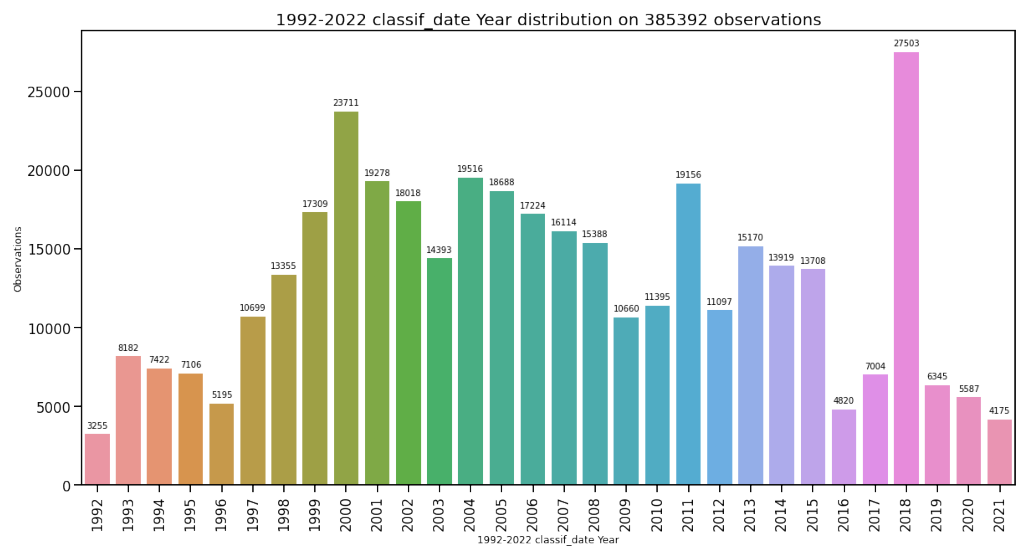

In [7]:
# complete dataset
plot_dist(df['classif_date'].dt.year, label=f'All classif_date Year');

# only between 1992 and 2022, both inclusive
df_year = df['classif_date'].dt.year
df_year = df_year[df_year.between(1992, 2022)]
plot_dist(df_year, label=f'1992-2022 classif_date Year');

## Distribuição das observações pela áreas de exame técnico

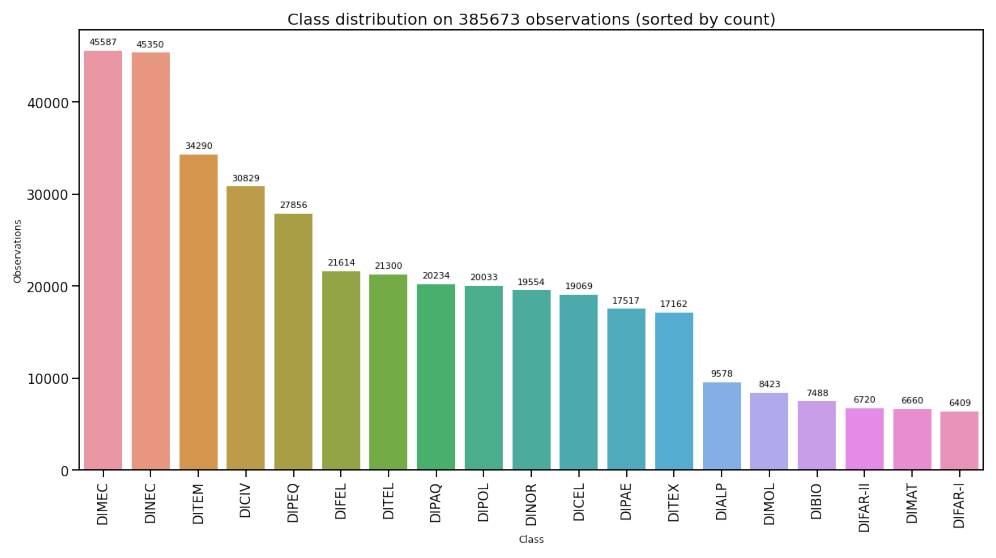

In [8]:
plot_dist(df['area'], label=f'Class', sort=True, data_points_fontsize=11);

## Distribuição das observações pela data de depósito

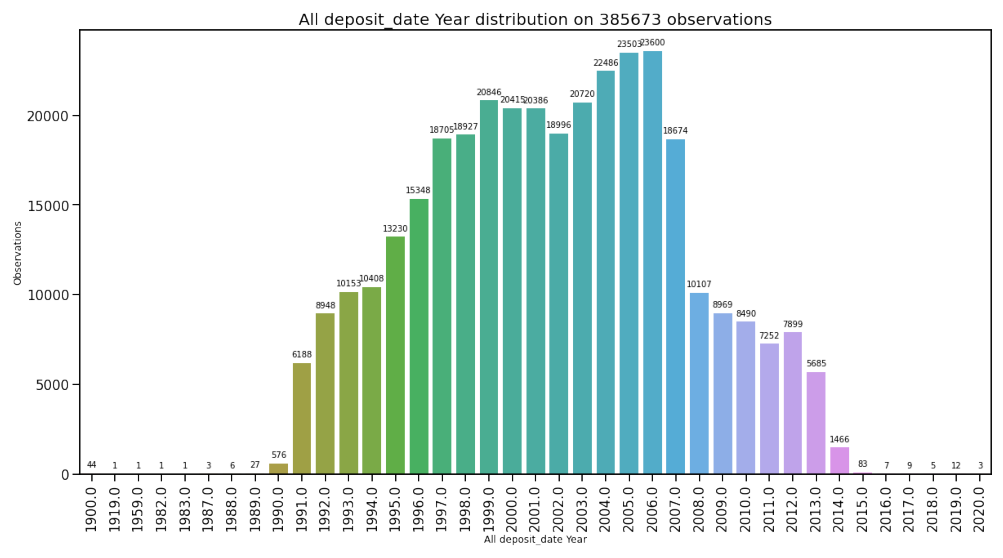

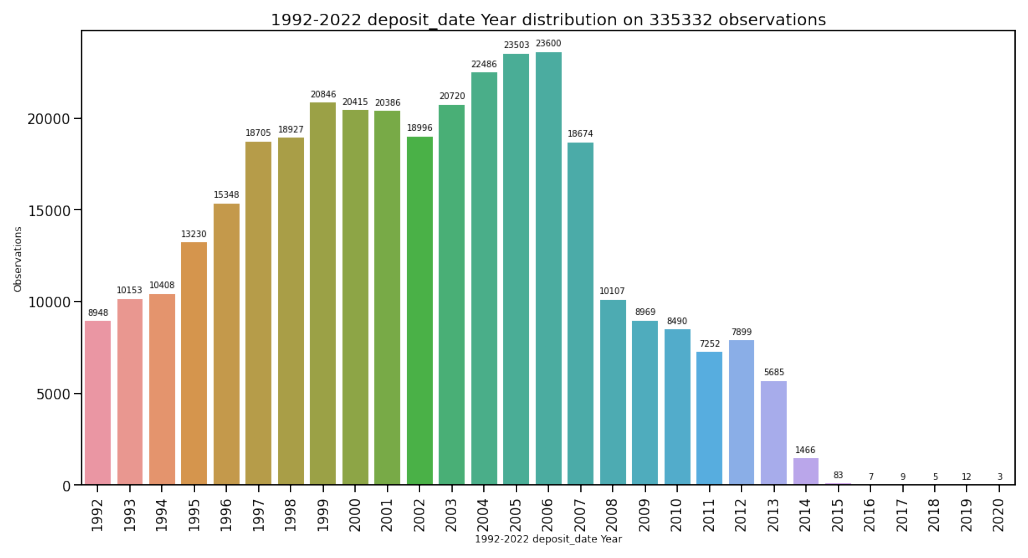

In [9]:
# whitout removing 1900
plot_dist(df['deposit_date'].dt.year, label=f'All deposit_date Year');

# only between 1992 and 2022, both inclusive
df_year = df['deposit_date'].dt.year
df_year = df_year[df_year.between(1992, 2022)]
plot_dist(df_year, label=f'1992-2022 deposit_date Year');

## Texto disponível para processamento

Campos título (title) e resumo (abstract)

### Sobreposição

Repetição completa do título no resumo

In [10]:
df.dropna(subset=['abstract'], inplace=True)

colision_rate = df.apply(lambda x: x['title'] in x['abstract'], axis=1).value_counts()[True]/df.shape[0]
print(f'Percentual das observações que tem a repetição completa do título no resumo: {colision_rate*100:.2f}%')

Percentual das observações que tem a repetição completa do título no resumo: 54.37%


### Comprimento

Quantidade média de palavras

#### Título

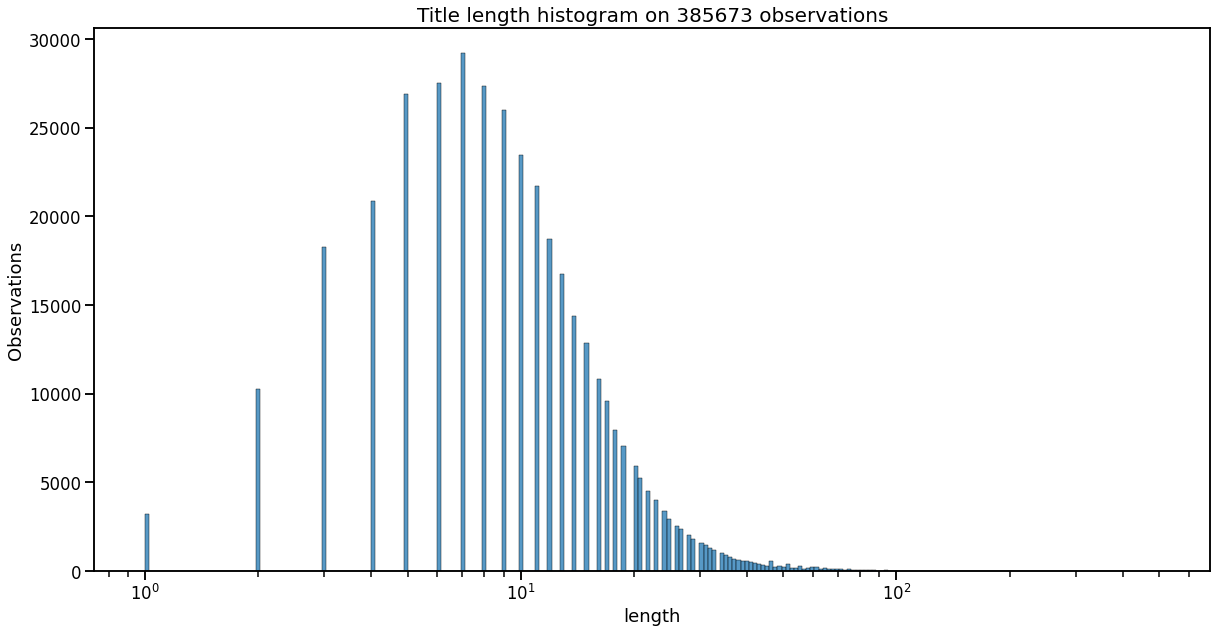

In [11]:
mean, std, median = text_length_hist(df['title'], 'Title')

In [12]:
print(f'Title -> Mean length: {mean:.0f} | Std: {std:.0f} | Median: {median:.0f}')
print(f'===>>> suggested max_length: {int(mean + std)}\n')

Title -> Mean length: 12 | Std: 10 | Median: 10
===>>> suggested max_length: 22



#### Resumo

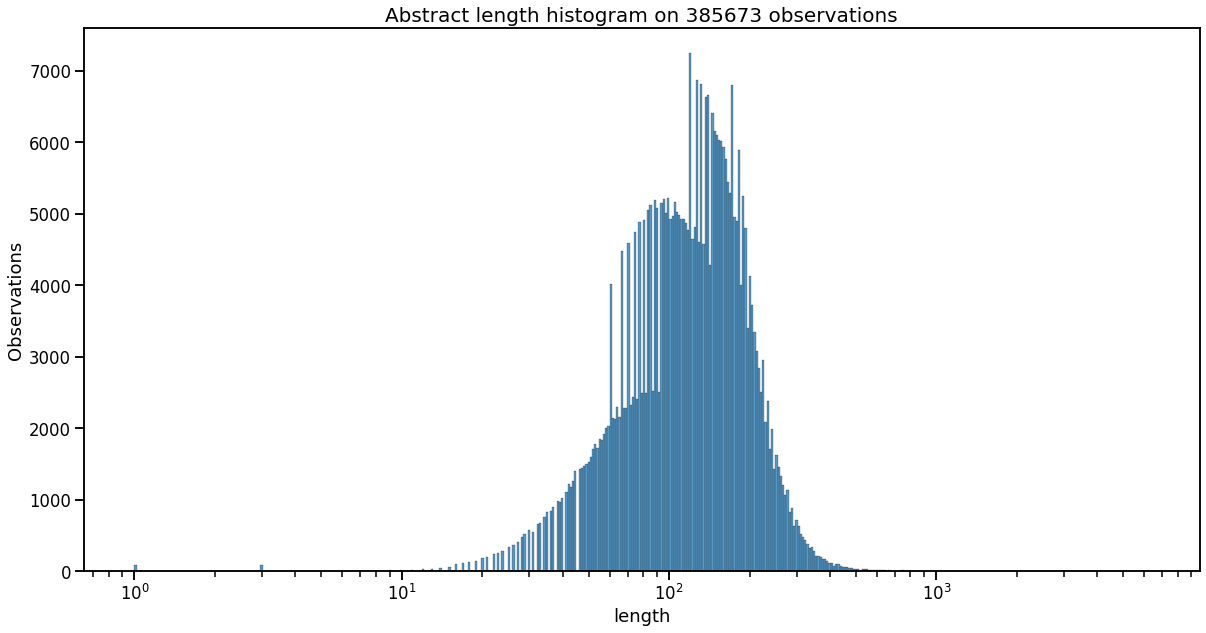

In [13]:
mean, std, median = text_length_hist(df['abstract'], 'Abstract')

In [14]:
print(f'Abstract -> Mean length: {mean:.0f} | Std: {std:.0f} | Median: {median:.0f}')
print(f'===>>> suggested max_length: {int(mean + std)}\n')

Abstract -> Mean length: 130 | Std: 73 | Median: 121
===>>> suggested max_length: 202



### Vocabulário

Todas as palavras de cada coluna de texto 

In [15]:
TOP = 30
DYNAMIC_STOP_WORDS_THESHOLD = [1.00, 0.95, 0.50, 0.30, 0.10, 0.05]

#### Title

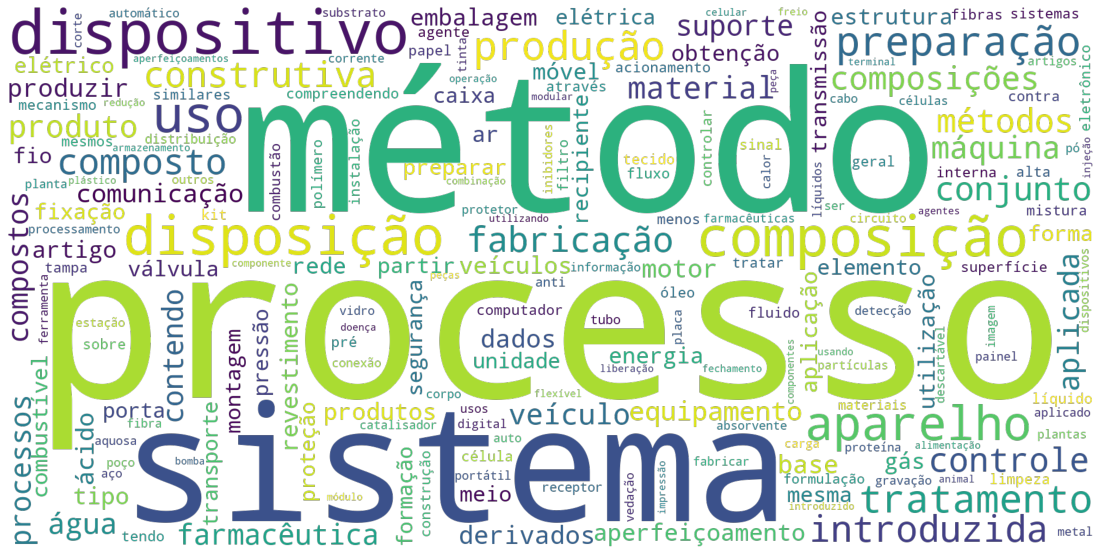

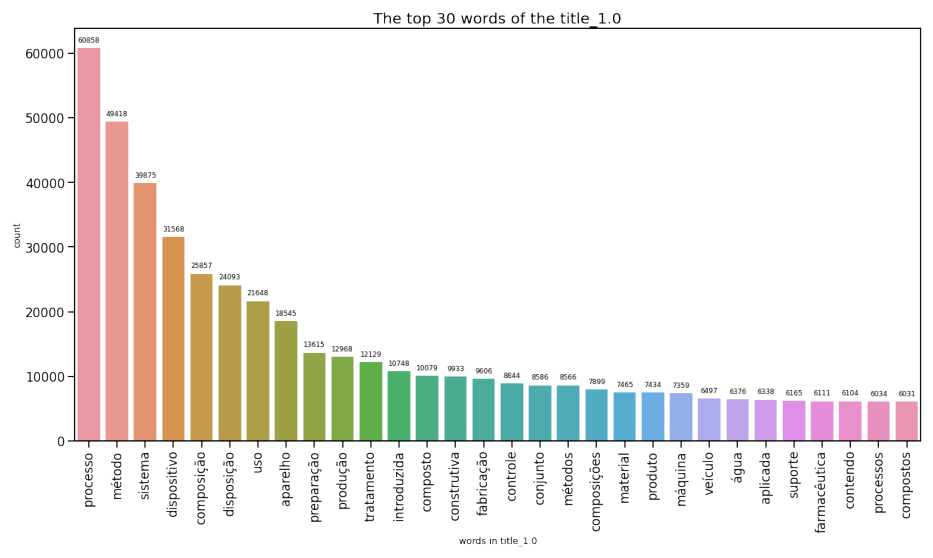

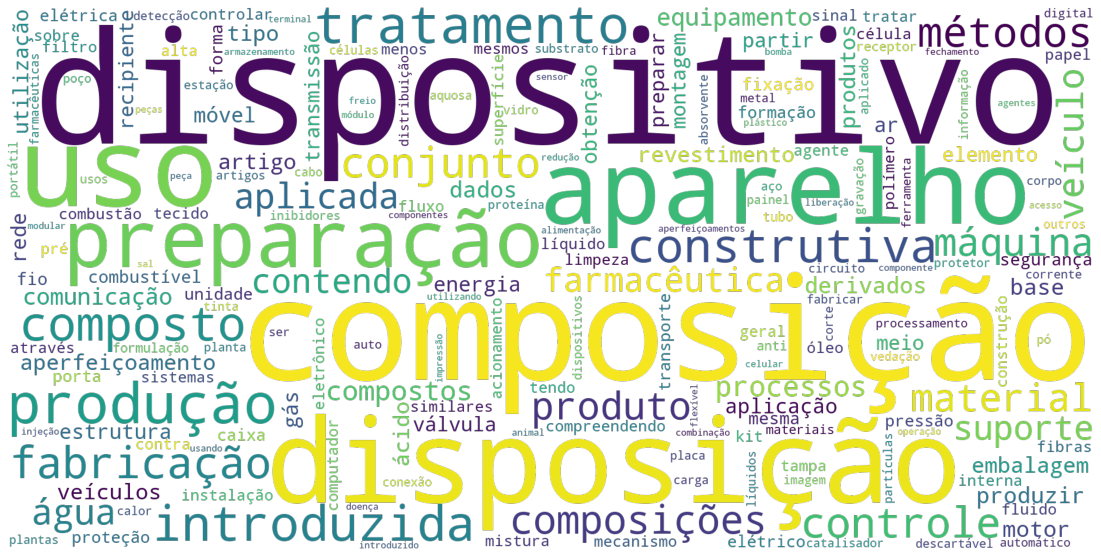

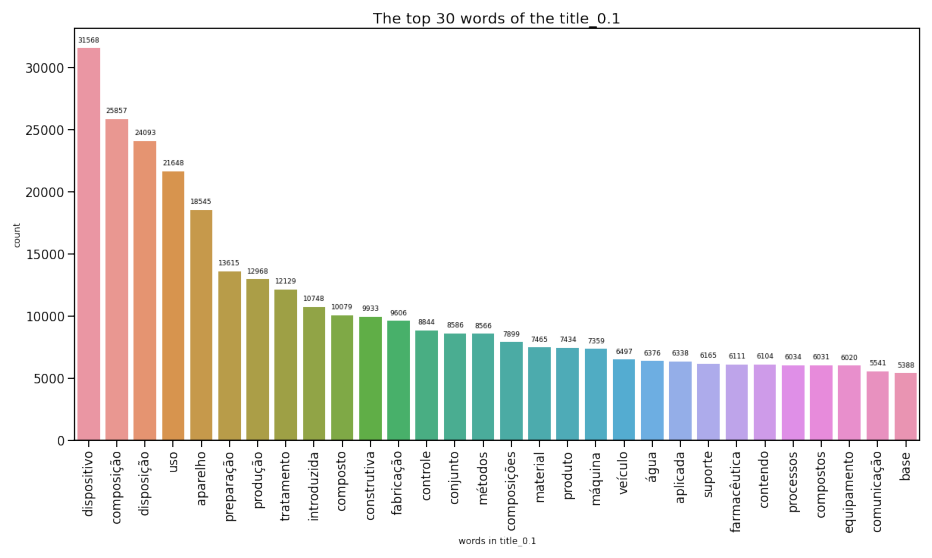

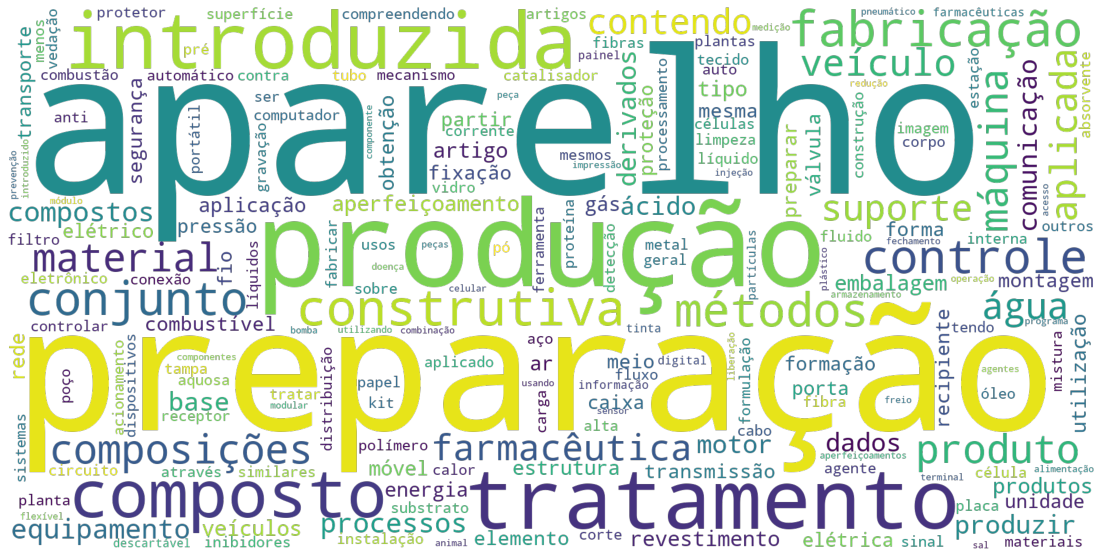

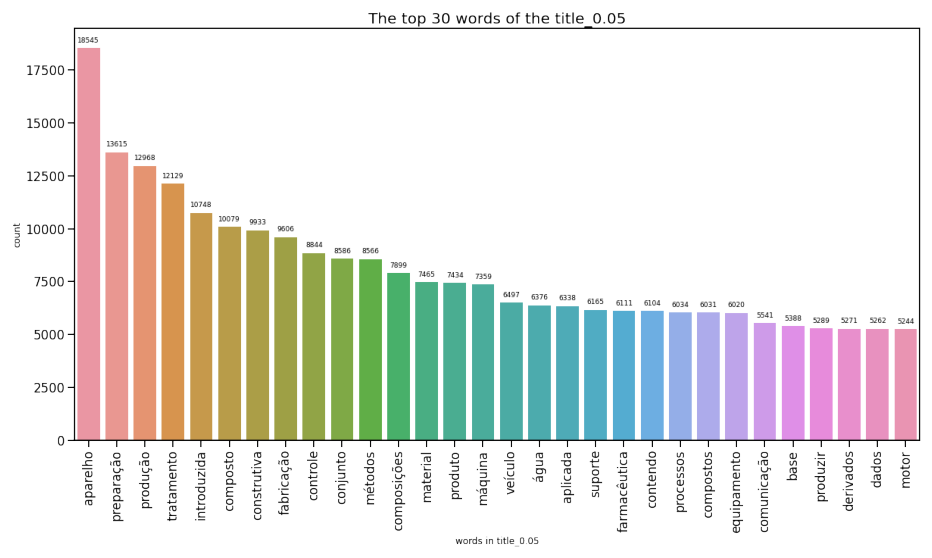

In [16]:
for column in ['Title']:
    for max_df in DYNAMIC_STOP_WORDS_THESHOLD:

        vocabulary, stop_words = count_words(df[column.lower()], max_df)
        if max_df == 1.00:
            T_1 = vocabulary

        print(f'{column} vocabulary with max_df = {max_df}, and excluding {len(STOP_WORDS)} stop-words: {len(vocabulary)}')
        print(f'==>> stopwords because max_df: {len(stop_words)} : {stop_words}')

        if max_df == 1.0 or len(stop_words) > 0:
            status = plot_wordcloud(vocabulary, label=f'{column}_{max_df}')
            
            vocabulary_ordered_tuples = sorted(vocabulary.items(), key=itemgetter(1), reverse=True)[0:]
            status = plot_bars(pd.DataFrame(vocabulary_ordered_tuples[:TOP], columns=['word', 'count']),
                               label=f'{column}_{max_df}',
                               data_points_fontsize=9)
        print(f'{"-"*50}')

#### Abstract

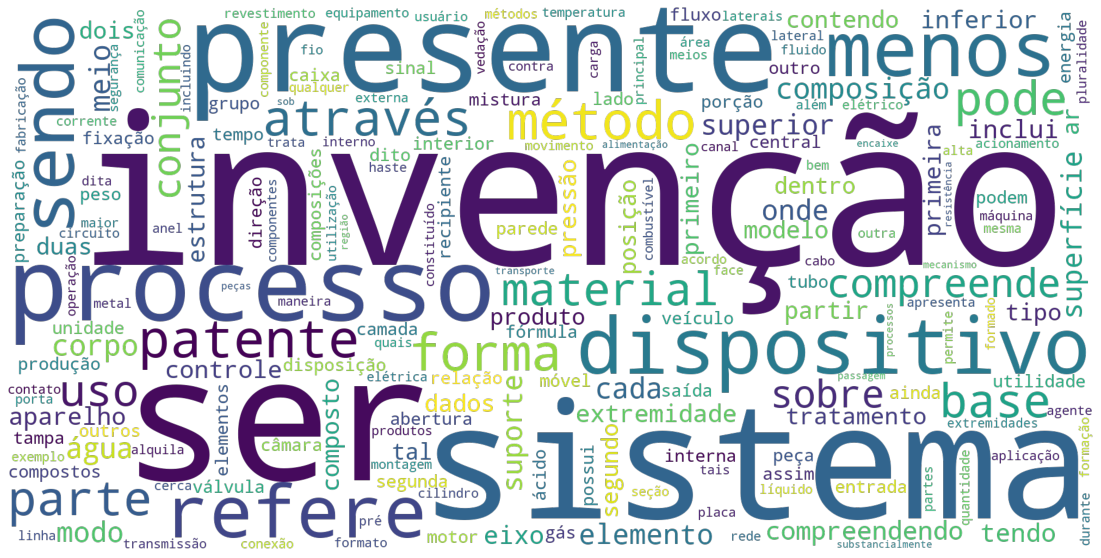

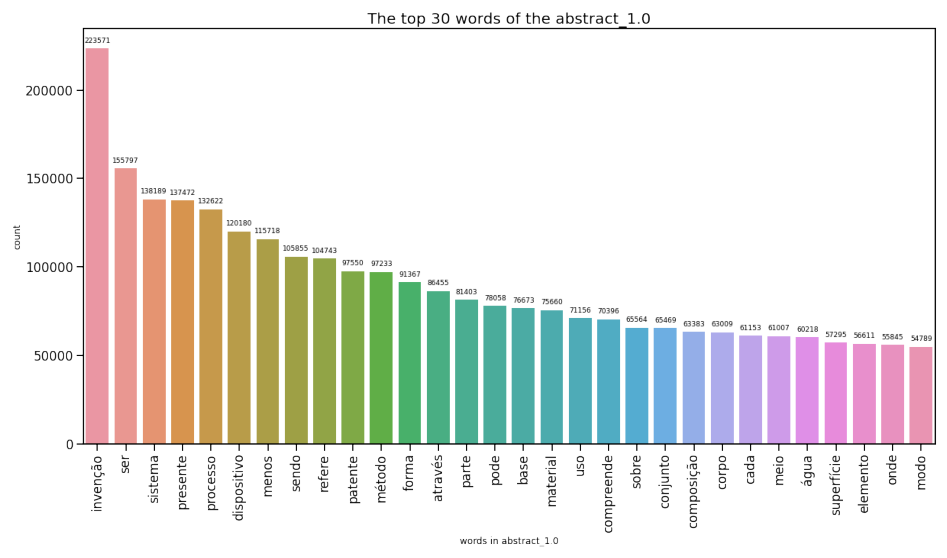

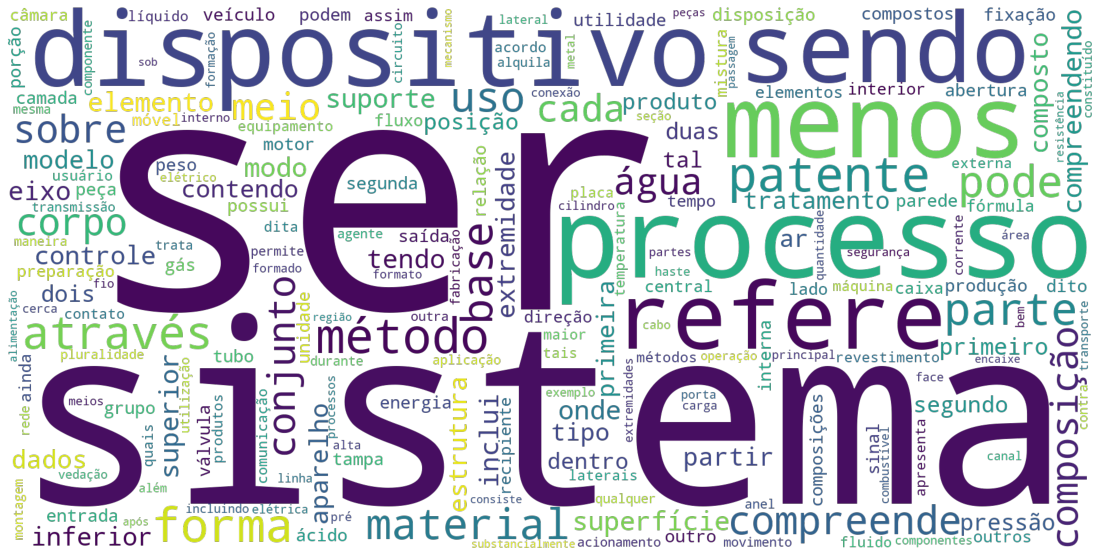

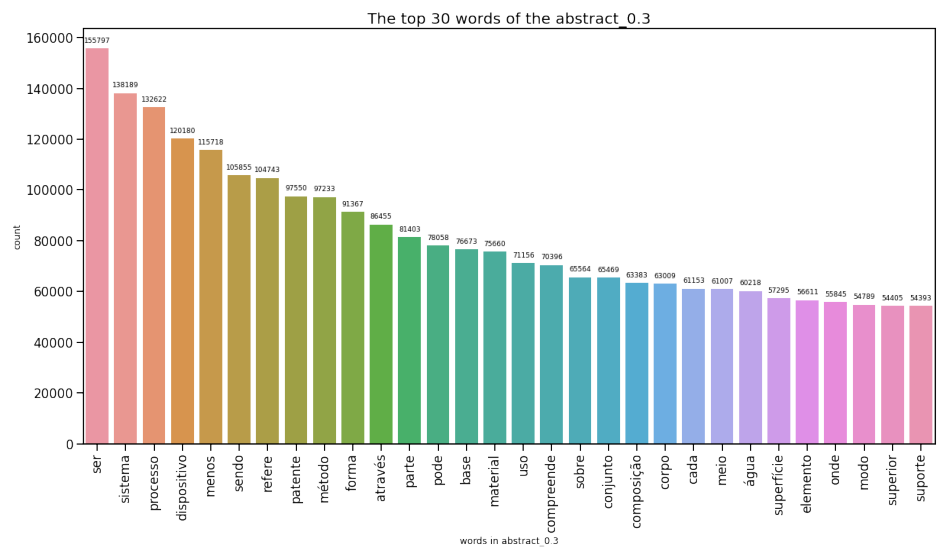

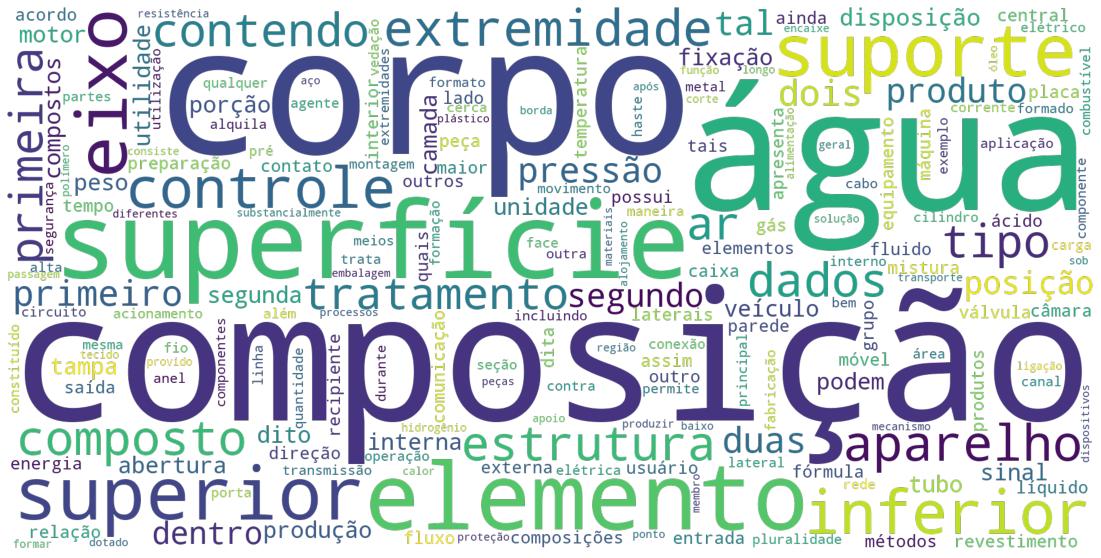

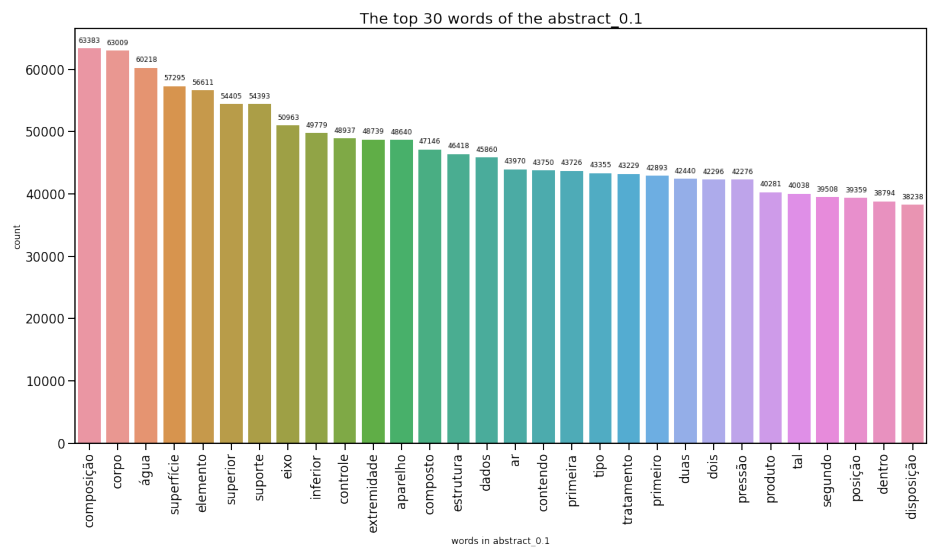

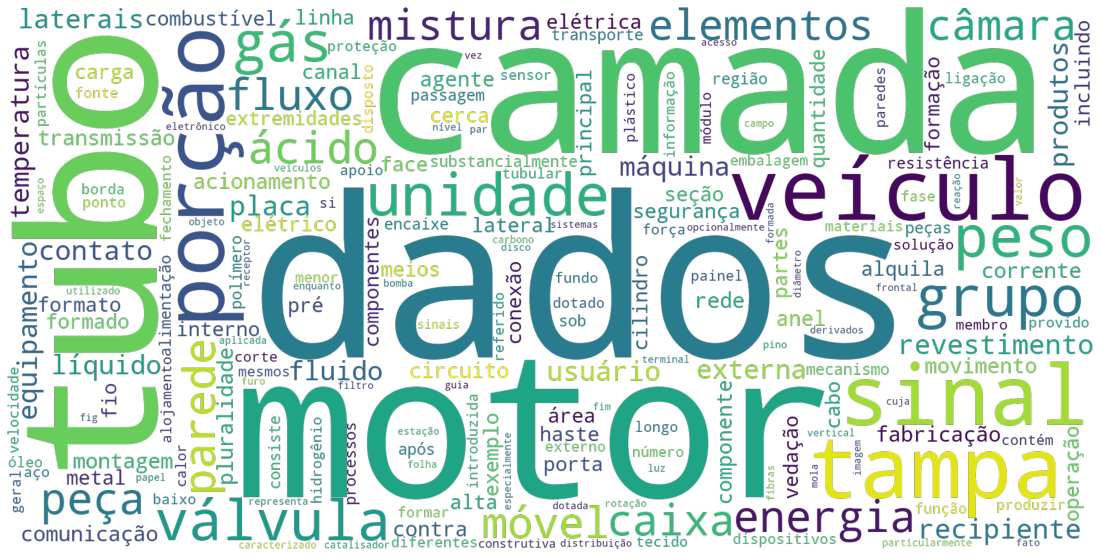

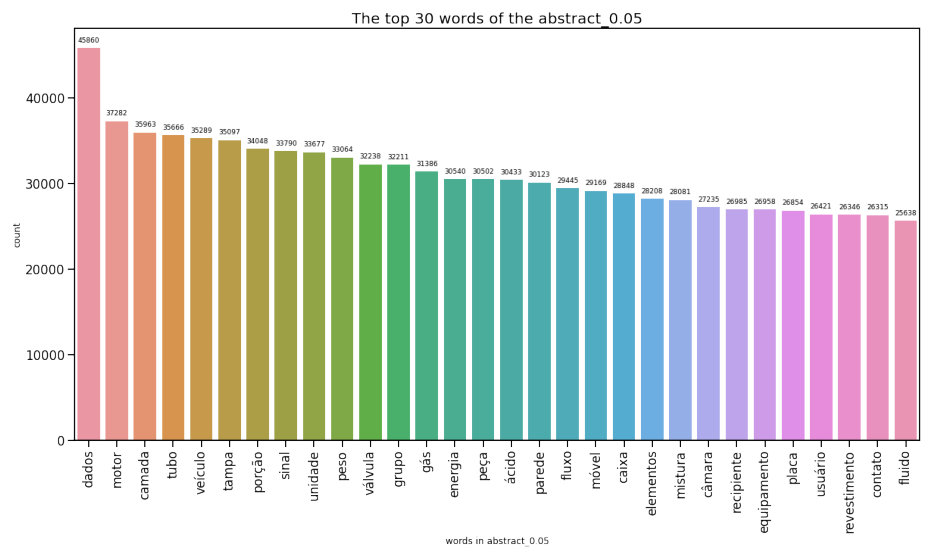

In [17]:
for column in ['Abstract']:
    for max_df in DYNAMIC_STOP_WORDS_THESHOLD:

        vocabulary, stop_words = count_words(df[column.lower()], max_df)
        if max_df == 1.00:
            A_1 = vocabulary

        print(f'{column} vocabulary with max_df = {max_df}, and excluding {len(STOP_WORDS)} stop-words: {len(vocabulary)}')
        print(f'==>> stopwords because max_df: {len(stop_words)} : {stop_words}')

        if max_df == 1.0 or len(stop_words) > 0:
            status = plot_wordcloud(vocabulary, label=f'{column}_{max_df}')
            
            vocabulary_ordered_tuples = sorted(vocabulary.items(), key=itemgetter(1), reverse=True)[0:]
            status = plot_bars(pd.DataFrame(vocabulary_ordered_tuples[:TOP], columns=['word', 'count']),
                               label=f'{column}_{max_df}',
                               data_points_fontsize=9)
        print(f'{"-"*50}')

#### Stopwords

Palavras do idioma Português que estão sendo descartadas.

In [18]:
print(len(STOP_WORDS), STOP_WORDS)

204 ['a', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'essa', 'essas', 'esse', 'esses', 'esta', 'estamos', 'estas', 'estava', 'estavam', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéramos', 'estivéssemos', 'estou', 'está', 'estávamos', 'estão', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'forem', 'formos', 'fosse', 'fossem', 'fui', 'fôramos', 'fôssemos', 'haja', 'hajam', 'hajamos', 'havemos', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houveram', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houvermos', 'houverá', 'houverão', 'houveríamos', 'houvesse', 'houvessem', 'houvéramos', 'houvéssemos', 'há', 'hão', 'isso', 'isto', 'já', 'lhe', 'lhes

### Título, resumo ou título+resumo?

Método | **sklearn.feature_extraction.text.CountVectorizer**

- Qual é o total de palavras no vocabulário do título e do resumo?
    - vocabulário do title: 89.292
    - vocabulário do abstract: 325.183

- Quantas palavras só ocorrem no título?
    - 9.061

Olhando os exemplos, parece que muitos casos são erros de digitação, ou seja, ruído, pois, são palavras que tendem a nunca se repetir. Vou deixar essas palavras de fora do vocabulário e utilizar exclusivamente o resumo no treinamento do BERTimbau BASE.

In [19]:
# vocabulário para o Title pelo método 1 ====> T_1 
# vocabulário para o Abstract pelo método 1 => A_1
# Diferença de T_1 para A_1?
SAMPLE_SIZE = 50
diff = list(set(set(T_1.keys()) - set(A_1.keys())))
sample = []
for index in np.random.randint(0, len(diff), SAMPLE_SIZE):
    sample.append(diff[index])
    
print(f'Total de palavras que só ocorrem no título: {len(diff)}')
print(f'Exemplos: {sample}')

Total de palavras que só ocorrem no título: 9061
Exemplos: ['voátil', 'roteamentode', 'celulasevetor', 'péluico', 'parafornos', 'alimentaçãoheterogênea', 'carcasses', 'franscos', 'diclorobenzila', 'emcolheradas', 'parasofá', 'hebricidas', 'lingandos', 'branqueamentocomposição', 'hidroxicetônicos', 'utincílios', 'conservacao', 'desbinadeira', 'acomponente', 'duplificador', 'manufaturacomposições', 'imunossurpressor', 'equipamenot', 'recipeente', 'fetilidade', 'bloquetas', 'intemperes', 'dadosdi', 'elestrostático', 'cristalizávelprocesso', 'autotransportavel', 'umser', 'metile', 'elimin', 'métode', 'alquilglucaminas', 'celuluar', 'equtpamentos', 'genese', 'abtidos', 'marcou', 'instrumenrto', 'multitecnologia', 'metoxiquina', 'carnitinase', 'quadradura', 'nagneto', 'batcubo', 'aminoeterificadas', 'comrepetidoras']


#### Double check

Método 1 | **sklearn.feature_extraction.text.CountVectorizer**
- vocabulário do title: 89.292
- vocabulário do abstract: 325.183

Método 2 | **scripts.machine_learning.get_word_df**
- vocabulário do title: N/A
- vocabulário do abstract: 331.560


In [20]:
corpus = df['abstract']
print(f'Número total de documentos: {len(corpus)}')
print(f'{"-"*50}')
for threshold in DYNAMIC_STOP_WORDS_THESHOLD:
    vocabulary, stopwords = get_word_df(corpus, threshold)
    if threshold == 1.00:
        A_2 = vocabulary
    print(f'Frequência mínima {len(corpus)*threshold} documentos. ({threshold*100}%)')
    print(f'Stopwords identificadas {len(stopwords)}/{len(vocabulary)}({(len(stopwords)/len(vocabulary))*100:.2f}%): {stopwords}')
    print(f'{"-"*50}')

Número total de documentos: 385673
--------------------------------------------------
Frequência mínima 385673.0 documentos. (100.0%)
Stopwords identificadas 0/331560(0.00%): {}
--------------------------------------------------
Frequência mínima 366389.35 documentos. (95.0%)
Stopwords identificadas 0/331560(0.00%): {}
--------------------------------------------------
Frequência mínima 192836.5 documentos. (50.0%)
Stopwords identificadas 0/331560(0.00%): {}
--------------------------------------------------
Frequência mínima 115701.9 documentos. (30.0%)
Stopwords identificadas 2/331560(0.00%): {'invenção': 183342, 'presente': 135716}
--------------------------------------------------
Frequência mínima 38567.3 documentos. (10.0%)
Stopwords identificadas 29/331560(0.01%): {'invenção': 183342, 'presente': 135716, 'ser': 113446, 'refere': 113046, 'patente': 95252, 'sendo': 78709, 'processo': 76603, 'menos': 76251, 'sistema': 72155, 'método': 69056, 'forma': 68683, 'compreende': 67120, 'at

#### Análise da divergência

In [21]:
# vocabulário para o Abstract pelo método 1 => A_1
# vocabulário para o Abstract pelo método 2 => A_2 

# Diferença
SAMPLE_SIZE = 30
diff = list(set(set(A_2.keys()) - set(A_1.keys())))
sample = []
for index in np.random.randint(0, len(diff), SAMPLE_SIZE):
    sample.append(diff[index])
    
print(f'Diferença total: {len(diff)}')
print(f'Exemplos de diferenças: {sample}')

Diferença total: 7682
Exemplos de diferenças: ['ou>', 'm<fd', '?transferência', '—ltimas', 'ijk=ijjk+', '?r', 'ut@eis', 'u?', 'm¿smax', 'si=', 'nch=cf', 'metalúrgicas?', 'cg>a', 'c<c', '+mn%', 'intervertebrais%', 'mo×%de', 'al*', 'c+*n', '’”', '<n', 'mb+ê', 'modificaã§ã£o', 'e+s+p=b', 'ep<dm', 'rbprfade+', 'policarboxã\xadlico', 'malha+', 'sobrepo@e', 'rã\xadgido']
